## NFL Punt Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NFL-Punt-Analysis" data-toc-modified-id="NFL-Punt-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NFL Punt Analysis</a></span></li><li><span><a href="#Installing-and-Importing-libraries-and-reading-necessary-files-:" data-toc-modified-id="Installing-and-Importing-libraries-and-reading-necessary-files-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installing and Importing libraries and reading necessary files :</a></span></li><li><span><a href="#Importing-datasets" data-toc-modified-id="Importing-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing datasets</a></span></li><li><span><a href="#EDA-of-video_review" data-toc-modified-id="EDA-of-video_review-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA of video_review</a></span><ul class="toc-item"><li><span><a href="#Frequency-distribution-of-Player-Activity-types" data-toc-modified-id="Frequency-distribution-of-Player-Activity-types-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Frequency distribution of Player Activity types</a></span></li><li><span><a href="#Adding-Other-and-Unclear-Activity-types" data-toc-modified-id="Adding-Other-and-Unclear-Activity-types-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Adding Other and Unclear Activity types</a></span></li><li><span><a href="#Frequency-distribution-of-Impact-types" data-toc-modified-id="Frequency-distribution-of-Impact-types-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Frequency distribution of Impact types</a></span></li><li><span><a href="#Distribution-of-Impact-type-against-Player-Activity" data-toc-modified-id="Distribution-of-Impact-type-against-Player-Activity-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Distribution of Impact type against Player Activity</a></span></li></ul></li><li><span><a href="#EDA-of-Game-Data" data-toc-modified-id="EDA-of-Game-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA of Game Data</a></span></li><li><span><a href="#EDA-on-relation-of-variables-on-concussion-rate" data-toc-modified-id="EDA-on-relation-of-variables-on-concussion-rate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA on relation of variables on concussion rate</a></span><ul class="toc-item"><li><span><a href="#Merging-Game-data-with-Video-review-data" data-toc-modified-id="Merging-Game-data-with-Video-review-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Merging Game data with Video review data</a></span></li><li><span><a href="#Daily-concussion-rates" data-toc-modified-id="Daily-concussion-rates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Daily concussion rates</a></span></li><li><span><a href="#Concussion-rates-by-stadium-type" data-toc-modified-id="Concussion-rates-by-stadium-type-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Concussion rates by stadium type</a></span></li><li><span><a href="#Concussion-rates-by-Temperature" data-toc-modified-id="Concussion-rates-by-Temperature-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Concussion rates by Temperature</a></span></li></ul></li><li><span><a href="#Formation-and-Concussion-Rates" data-toc-modified-id="Formation-and-Concussion-Rates-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Formation and Concussion Rates</a></span><ul class="toc-item"><li><span><a href="#Merging-formations-data-with-play-information-data" data-toc-modified-id="Merging-formations-data-with-play-information-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Merging formations data with play information data</a></span></li><li><span><a href="#Merging-formations-data-with-video-review-data" data-toc-modified-id="Merging-formations-data-with-video-review-data-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Merging formations data with video review data</a></span></li><li><span><a href="#Sorting-final-formation-data-by-Injury-counts" data-toc-modified-id="Sorting-final-formation-data-by-Injury-counts-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Sorting final formation data by Injury counts</a></span><ul class="toc-item"><li><span><a href="#Filling-nulls-with-zeroes" data-toc-modified-id="Filling-nulls-with-zeroes-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Filling nulls with zeroes</a></span></li></ul></li></ul></li><li><span><a href="#Next-Steps:" data-toc-modified-id="Next-Steps:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Next Steps:</a></span></li></ul></div>

## Installing and Importing libraries and reading necessary files :

In [253]:
# function to check for installed packages and install missing packages

check_and_install <- function(packages){
new.packages <- packages[!(packages %in% installed.packages()[, "Package"])]

if (length(new.packages)) 
    print(paste0("Installing missing package: ", new.packages))
    install.packages(new.packages, dependencies = TRUE,repos = "http://cran.us.r-project.org")
    sapply(packages, require, character.only = TRUE)
}
 
# required packages
required.packages <- c("ggplot2", "dplyr", "reshape2", "devtools", "shiny", "shinydashboard", 
                       "caret","randomForest","gbm","tm","forecast","knitr","Rcpp","stringr",
                       "lubridate","manipulate","Scale","sqldf","RMongo","foreign","googleVis",
                       "XML","roxygen2","plotly","parallel","car")
check_and_install(required.packages)

[1] "Installing missing package: RMongo"


Installing package into 'C:/Users/Advait/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'RMongo' is not available (for R version 3.4.3)"Loading required package: RMongo
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'RMongo'"

ggplot2          dplyr       reshape2       devtools          shiny 
          TRUE           TRUE           TRUE           TRUE           TRUE 
shinydashboard          caret   randomForest            gbm             tm 
          TRUE           TRUE           TRUE           TRUE           TRUE 
      forecast          knitr           Rcpp        stringr      lubridate 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    manipulate          Scale          sqldf         RMongo        foreign 
          TRUE           TRUE           TRUE          FALSE           TRUE 
     googleVis            XML       roxygen2         plotly       parallel 
          TRUE           TRUE           TRUE           TRUE           TRUE 
           car 
          TRUE

In [254]:
oldw <- getOption("warn")
options(warn = -1)

library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)
library(repr)

options(warn = oldw)

## Importing datasets

In [255]:
path <- "../Data/"

In [256]:
game_data <- read.csv(paste0(path,'GD1.csv'))
player_role <- read.csv(paste0(path,'play_player_role_data.csv'))
play_info <- read.csv(paste0(path,'play_information.csv'))
play_punt <- read.csv(paste0(path,'player_punt_data.csv'))
vid_rev <- read.csv(paste0(path,'video_review.csv'))
vid_injury <- read.csv(paste0(path,'video_footage-injury.csv'))
vid_control <- read.csv(paste0(path,'video_footage-control.csv'))

## EDA of video_review 

In [257]:
head(vid_rev)

Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire,X
2016,5,3129,29492,Tackling,No,Helmet-to-body,33445,Tackling,Yes,Soldier Field
2016,21,2587,32323,Blocked,No,Helmet-to-helmet,31930,Blocking,No,Nissan Stadium
2016,29,538,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No,FedExField
2016,45,1212,27595,Tackled,No,Helmet-to-helmet,31950,Tackling,No,MetLife
2016,54,1045,32410,Blocking,No,Helmet-to-body,23259,Blocked,No,Bank of America Stadium
2016,60,905,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes,Ford Field


In [258]:
summary(vid_rev)

  Season_Year      GameKey          PlayID         GSISID     
 Min.   :2016   Min.   :  5.0   Min.   : 183   Min.   :23564  
 1st Qu.:2016   1st Qu.:218.0   1st Qu.:1262   1st Qu.:28987  
 Median :2016   Median :296.0   Median :2341   Median :31313  
 Mean   :2016   Mean   :323.2   Mean   :2186   Mean   :30642  
 3rd Qu.:2017   3rd Qu.:448.0   3rd Qu.:2918   3rd Qu.:32615  
 Max.   :2017   Max.   :618.0   Max.   :3746   Max.   :33941  
                                                              
 Player_Activity_Derived Turnover_Related       Primary_Impact_Type
 Blocked :10             No:37            Helmet-to-body  :17      
 Blocking: 8                              Helmet-to-ground: 2      
 Tackled : 6                              Helmet-to-helmet:17      
 Tackling:13                              Unclear         : 1      
                                                                   
                                                                   
                    

In [259]:
str(vid_rev)

'data.frame':	37 obs. of  11 variables:
 $ Season_Year                     : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ GameKey                         : int  5 21 29 45 54 60 144 149 189 218 ...
 $ PlayID                          : int  3129 2587 538 1212 1045 905 2342 3663 3509 3468 ...
 $ GSISID                          : int  29492 32323 29343 27595 32410 32444 30171 29793 30384 32403 ...
 $ Player_Activity_Derived         : Factor w/ 4 levels "Blocked","Blocking",..: 4 1 1 3 2 1 4 2 1 2 ...
 $ Turnover_Related                : Factor w/ 1 level "No": 1 1 1 1 1 1 1 1 1 1 ...
 $ Primary_Impact_Type             : Factor w/ 4 levels "Helmet-to-body",..: 1 3 3 3 1 1 1 3 4 3 ...
 $ Primary_Partner_GSISID          : Factor w/ 35 levels "","23259","24535",..: 33 19 12 21 2 15 8 23 35 30 ...
 $ Primary_Partner_Activity_Derived: Factor w/ 6 levels "","Blocked","Blocking",..: 5 3 3 5 2 2 4 2 6 2 ...
 $ Friendly_Fire                   : Factor w/ 4 levels "","No","Unclear",

### Frequency distribution of Player Activity types

Player_Activity_Derived,Count
Blocked,10
Blocking,8
Tackled,6
Tackling,13


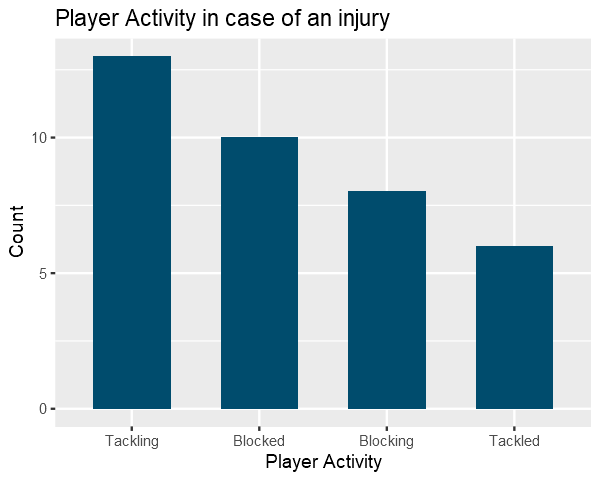

In [260]:
vidrev_pivot1 <- vid_rev %>% group_by(Player_Activity_Derived) %>% dplyr::summarize(Count = n())
vidrev_pivot1 
options(repr.plot.width=5, repr.plot.height=4)
ggplot(data=vidrev_pivot1, aes(x=reorder(Player_Activity_Derived, -Count), y=Count)) + geom_bar(stat='identity', fill="#004c6d", width=0.6 ) + labs(title = "Player Activity in case of an injury",x="Player Activity")

### Adding Other and Unclear Activity types


In [261]:
vidrevpart_pivot <- vid_rev %>% group_by(Primary_Partner_Activity_Derived) %>% summarise(Count = n())
vidrevpart_pivot 

Primary_Partner_Activity_Derived,Count
,2
Blocked,10
Blocking,6
Tackled,8
Tackling,10
Unclear,1


In [262]:
vidrevpart_pivot$Primary_Partner_Activity_Derived <- as.character(vidrevpart_pivot$Primary_Partner_Activity_Derived)

In [263]:
vidrevpart_pivot[vidrevpart_pivot$Primary_Partner_Activity_Derived == "","Primary_Partner_Activity_Derived"] <- "Other"

In [264]:
vidrevpart_pivot

Primary_Partner_Activity_Derived,Count
Other,2
Blocked,10
Blocking,6
Tackled,8
Tackling,10
Unclear,1


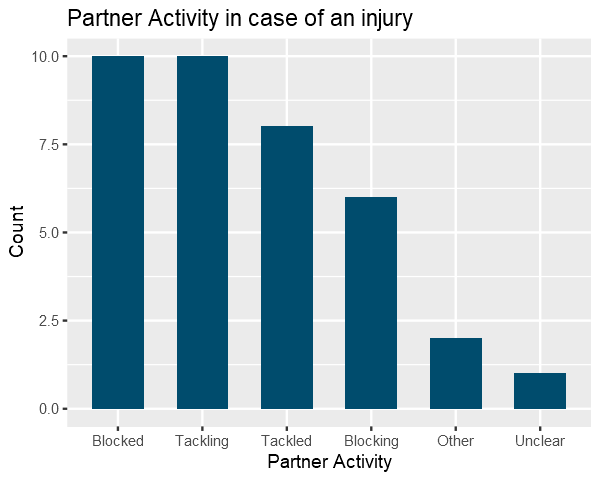

In [265]:
ggplot(data=vidrevpart_pivot, aes(x=reorder(Primary_Partner_Activity_Derived, -Count), y=Count)) + geom_bar(stat='identity', fill="#004c6d", width=0.6 ) + labs(title = "Partner Activity in case of an injury",x="Partner Activity")

__Note:__ "Other" is where impact was with ground, hence no partner.

### Frequency distribution of Impact types

Primary_Impact_Type,Count
Helmet-to-body,17
Helmet-to-ground,2
Helmet-to-helmet,17
Unclear,1


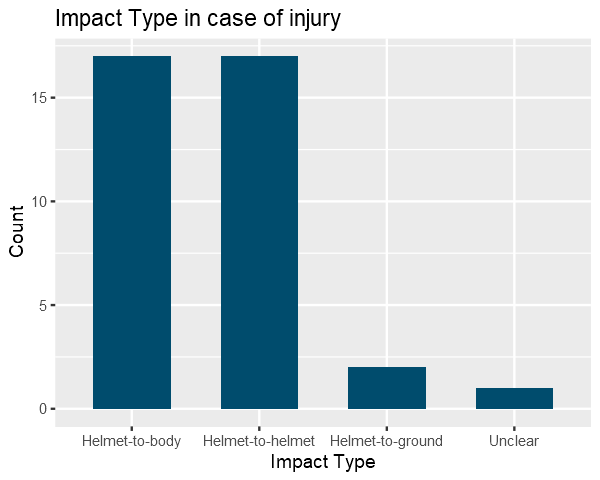

In [266]:
vidrev_pivot2 <- vid_rev %>% group_by(Primary_Impact_Type) %>% dplyr::summarize(Count = n()) 
vidrev_pivot2
ggplot(data=vidrev_pivot2, aes(x=reorder(Primary_Impact_Type, -Count), y=Count)) + geom_bar(stat='identity', fill="#004c6d", width = 0.6) + labs(x="Impact Type", title="Impact Type in case of injury")

### Distribution of Impact type against Player Activity
- Certain impact type - Player Activity combinations have higher amounts of concussions

In [267]:
vidrev_pivot3 <- vid_rev %>% group_by(Player_Activity_Derived,Primary_Impact_Type) %>% dplyr::summarize(Count = n()) 
vidrev_pivot3$Percent_concussion <- vidrev_pivot3$Count*100/sum(vidrev_pivot3$Count)
vidrev_pivot3 

Player_Activity_Derived,Primary_Impact_Type,Count,Percent_concussion
Blocked,Helmet-to-body,3,8.108108
Blocked,Helmet-to-ground,1,2.702703
Blocked,Helmet-to-helmet,5,13.513514
Blocked,Unclear,1,2.702703
Blocking,Helmet-to-body,4,10.810811
Blocking,Helmet-to-helmet,4,10.810811
Tackled,Helmet-to-body,2,5.405405
Tackled,Helmet-to-helmet,4,10.810811
Tackling,Helmet-to-body,8,21.621622
Tackling,Helmet-to-ground,1,2.702703


In [268]:
#we need to retain values for all levels of pivot table
temp_df1 <- merge(unique(vidrev_pivot3$Primary_Impact_Type),unique(vidrev_pivot3$Player_Activity_Derived))
colnames(temp_df1 ) <- c("Primary_Impact_Type","Player_Activity_Derived")
vidrev_pivot3 <- merge(temp_df1,vidrev_pivot3,by=c('Primary_Impact_Type','Player_Activity_Derived'),all.x=TRUE)
vidrev_pivot3[is.na(vidrev_pivot3)] <- 0
vidrev_pivot3


Primary_Impact_Type,Player_Activity_Derived,Count,Percent_concussion
Helmet-to-body,Blocked,3,8.108108
Helmet-to-body,Blocking,4,10.810811
Helmet-to-body,Tackled,2,5.405405
Helmet-to-body,Tackling,8,21.621622
Helmet-to-ground,Blocked,1,2.702703
Helmet-to-ground,Blocking,0,0.000000
Helmet-to-ground,Tackled,0,0.000000
Helmet-to-ground,Tackling,1,2.702703
Helmet-to-helmet,Blocked,5,13.513514
Helmet-to-helmet,Blocking,4,10.810811


Primary_Impact_Type,Blocked,Blocking,Tackled,Tackling
Helmet-to-body,3,4,2,8
Helmet-to-ground,1,0,0,1
Helmet-to-helmet,5,4,4,4
Unclear,1,0,0,0


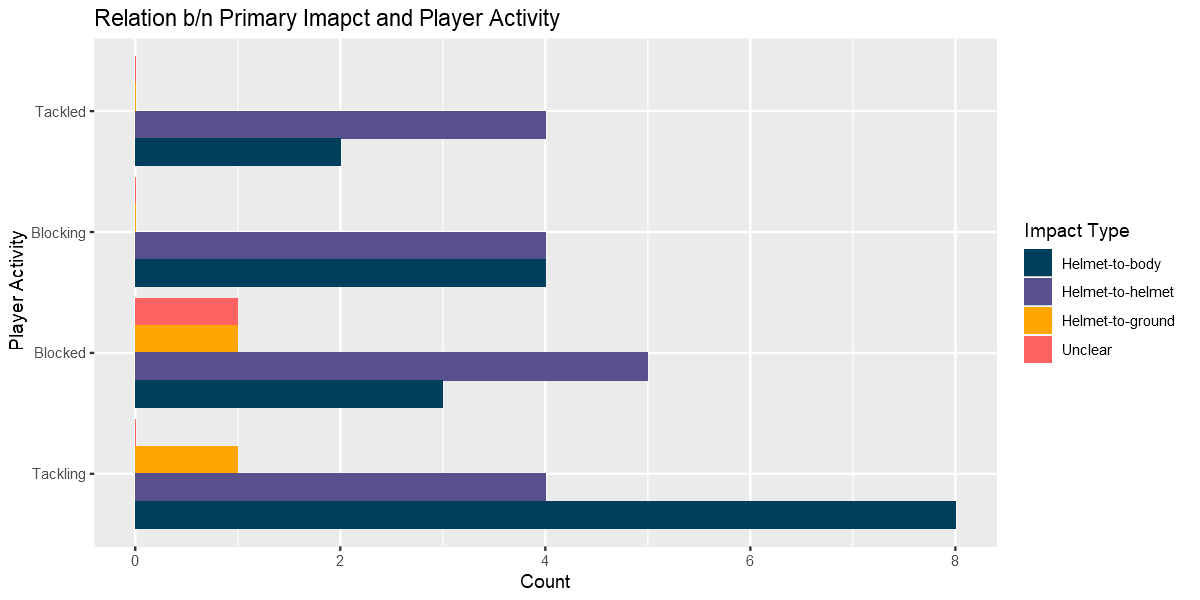

In [269]:
vidrev_pivot31 <- select(vidrev_pivot3, Primary_Impact_Type, Player_Activity_Derived, Count)
vidrev_pivot4 <- vidrev_pivot31 %>% spread(Player_Activity_Derived, Count)
vidrev_pivot4
options(repr.plot.width=10, repr.plot.height=5)
ggplot(data=vidrev_pivot31, 
       aes(x=reorder(Player_Activity_Derived, -Count), y=Count, 
           fill=reorder(Primary_Impact_Type, -Count))) + geom_bar(stat='identity', 
                                                                  position=position_dodge()) + 
        scale_fill_manual(values=c("#003f5c", "#58508d","#ffa600","#ff6361")) + 
        labs(title = "Relation b/n Primary Imapct and Player Activity", x="Player Activity") + 
        coord_flip() + 
        guides(fill=guide_legend(title="Impact Type"))

## EDA of Game Data

In [270]:
head(game_data)

GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,,NA,
2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79,Sunny
3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94,Partly Cloudy
4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,,73,
5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88,
6,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Pittsburgh,19:00,Pittsburgh Steelers,PIT,Detroit Lions,DET,Heinz Field,Outdoors,Grass,Partly Cloudy,82,Partly Cloudy


In [271]:
summary(game_data)

    GameKey       Season_Year   Season_Type      Week       
 Min.   :  1.0   Min.   :2016   Post: 24    Min.   : 1.000  
 1st Qu.:167.2   1st Qu.:2016   Pre :130    1st Qu.: 3.000  
 Median :333.5   Median :2016   Reg :512    Median : 6.000  
 Mean   :333.5   Mean   :2016               Mean   : 7.724  
 3rd Qu.:499.8   3rd Qu.:2017               3rd Qu.:12.000  
 Max.   :666.0   Max.   :2017               Max.   :17.000  
                                                            
                   Game_Date        Game_Day             Game_Site  
 2017-01-01 00:00:00.000: 16   Friday   : 19   East Rutherford: 40  
 2017-08-31 00:00:00.000: 16   Monday   : 36   Foxborough     : 24  
 2017-12-31 00:00:00.000: 16   Saturday : 63   Atlanta        : 22  
 2016-09-01 00:00:00.000: 15   Sunday   :453   Houston        : 22  
 2016-09-18 00:00:00.000: 14   Thursday : 93   Kansas City    : 22  
 2016-09-25 00:00:00.000: 14   Wednesday:  2   Minneapolis    : 22  
 (Other)                :575 

In [272]:
str(game_data)

'data.frame':	666 obs. of  18 variables:
 $ GameKey       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Season_Year   : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Season_Type   : Factor w/ 3 levels "Post","Pre","Reg": 2 2 2 2 2 2 2 2 2 2 ...
 $ Week          : int  1 2 2 2 2 2 2 2 2 2 ...
 $ Game_Date     : Factor w/ 145 levels "2016-08-07 00:00:00.000",..: 1 4 2 3 2 3 5 4 2 3 ...
 $ Game_Day      : Factor w/ 6 levels "Friday","Monday",..: 4 3 5 1 5 1 4 3 5 1 ...
 $ Game_Site     : Factor w/ 39 levels "Arlington","Atlanta",..: 17 22 3 15 7 33 35 30 12 12 ...
 $ Start_Time    : Factor w/ 40 levels "12:00","12:30",..: 36 22 35 31 31 31 17 31 35 31 ...
 $ Home_Team     : Factor w/ 35 levels "AFC","Arizona Cardinals",..: 15 19 4 13 7 29 31 5 25 24 ...
 $ HomeTeamCode  : Factor w/ 35 levels "AFC","ARZ","ATL",..: 15 18 4 13 7 29 32 5 26 25 ...
 $ Visit_Team    : Factor w/ 35 levels "AFC","Arizona Cardinals",..: 13 10 6 9 11 12 14 15 16 20 ...
 $ VisitTeamCode : Factor w/ 35 levels "A

In [273]:
game_data$injury <- game_data$GameKey %in% vid_rev$GameKey
str(game_data)

'data.frame':	666 obs. of  19 variables:
 $ GameKey       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Season_Year   : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Season_Type   : Factor w/ 3 levels "Post","Pre","Reg": 2 2 2 2 2 2 2 2 2 2 ...
 $ Week          : int  1 2 2 2 2 2 2 2 2 2 ...
 $ Game_Date     : Factor w/ 145 levels "2016-08-07 00:00:00.000",..: 1 4 2 3 2 3 5 4 2 3 ...
 $ Game_Day      : Factor w/ 6 levels "Friday","Monday",..: 4 3 5 1 5 1 4 3 5 1 ...
 $ Game_Site     : Factor w/ 39 levels "Arlington","Atlanta",..: 17 22 3 15 7 33 35 30 12 12 ...
 $ Start_Time    : Factor w/ 40 levels "12:00","12:30",..: 36 22 35 31 31 31 17 31 35 31 ...
 $ Home_Team     : Factor w/ 35 levels "AFC","Arizona Cardinals",..: 15 19 4 13 7 29 31 5 25 24 ...
 $ HomeTeamCode  : Factor w/ 35 levels "AFC","ARZ","ATL",..: 15 18 4 13 7 29 32 5 26 25 ...
 $ Visit_Team    : Factor w/ 35 levels "AFC","Arizona Cardinals",..: 13 10 6 9 11 12 14 15 16 20 ...
 $ VisitTeamCode : Factor w/ 35 levels "A

## EDA on relation of variables on concussion rate

### Merging Game data with Video review data

In [274]:
oldw <- getOption("warn")
options(warn = -1)
adv_gamedata <- merge(game_data,vid_rev, by="GameKey", all.y=TRUE)
adv_gamedata$Primary_Partner_Activity_Derived[adv_gamedata$Primary_Partner_Activity_Derived==""] <- "NA"
head(adv_gamedata)
options(warn = oldw)

GameKey,Season_Year.x,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,...,Season_Year.y,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire,X
5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,...,2016,3129,29492,Tackling,No,Helmet-to-body,33445,Tackling,Yes,Soldier Field
21,2016,Pre,3,2016-08-20 00:00:00.000,Saturday,Nashville,14:00,Tennessee Titans,TEN,...,2016,2587,32323,Blocked,No,Helmet-to-helmet,31930,Blocking,No,Nissan Stadium
29,2016,Pre,3,2016-08-19 00:00:00.000,Friday,Landover,19:30,Washington Redskins,WAS,...,2016,538,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No,FedExField
45,2016,Pre,4,2016-08-27 00:00:00.000,Saturday,East Rutherford,19:30,New York Jets,NYJ,...,2016,1212,27595,Tackled,No,Helmet-to-helmet,31950,Tackling,No,MetLife
54,2016,Pre,5,2016-09-01 00:00:00.000,Thursday,Charlotte,19:30,Carolina Panthers,CAR,...,2016,1045,32410,Blocking,No,Helmet-to-body,23259,Blocked,No,Bank of America Stadium
60,2016,Pre,5,2016-09-01 00:00:00.000,Thursday,Detroit,19:30,Detroit Lions,DET,...,2016,905,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes,Ford Field


### Daily concussion rates

In [310]:
oldw <- getOption("warn")
options(warn = -1)
adgd_total <- game_data %>% group_by(Game_Day) %>% dplyr::summarize(Total_Count = n())
adgd_pivot <- adv_gamedata %>% group_by(Game_Day) %>% dplyr::summarize(Injury_Count = n())
adgd <- merge(adgd_total,adgd_pivot, by="Game_Day", all=TRUE)
adgd[is.na(adgd)] <- 0
adgdsort <- adgd %>% group_by(Total_Count,Injury_Count)%>%
  mutate("Mean"=Injury_Count/(Total_Count+Injury_Count))
arrange(adgdsort, desc(Mean))
options(warn = oldw)

Game_Day,Total_Count,Injury_Count,Mean
Thursday,93,11,0.10576923
Saturday,63,5,0.07352941
Monday,36,2,0.05263158
Friday,19,1,0.05000000
Sunday,453,18,0.03821656
Wednesday,2,0,0.00000000


Observation: Chances of Injury on a Thursday are high but very low on a Sunday. 

Let's see if stadium type has anything to do with punt related concussions.

### Concussion rates by stadium type

In [276]:
adgd_stad_type <- game_data %>% group_by(StadiumType) %>% dplyr::summarize(Total_Count = n())
#removing first row as it doesn't specify any type
adgd_stad_type <- adgd_stad_type[-c(1), ]
adgd_stad_type
adgd_stad_pivot <- adv_gamedata %>% group_by(StadiumType) %>% dplyr::summarize(Injury_Count = n())
adgd_stad_pivot <- adgd_stad_pivot[-c(1), ]
adgd_stad_pivot

StadiumType,Total_Count
Closed Dome,2
Dome,21
"Dome, closed",2
"Domed, closed",2
Heinz Field,1
Indoor,42
"Indoor, fixed roof",1
"Indoor, Fixed Roof",1
"Indoor, Non-Retractable Dome",1
"Indoor, non-retractable roof",2


StadiumType,Injury_Count
Dome,1
Indoors,2
Open,1
Outdoor,20
Outdoors,6
Outdoors,1
Outside,1
Retr. Roof - Closed,2
Retractable Roof,2


The data is very noisy, yet we can see here that injuries occur more on outdoor Stadium Types. 

Let's see if temperature has anything to do with punt related concussions.

### Concussion rates by Temperature
- It can be seen that colder games are more likely to result in concussions.

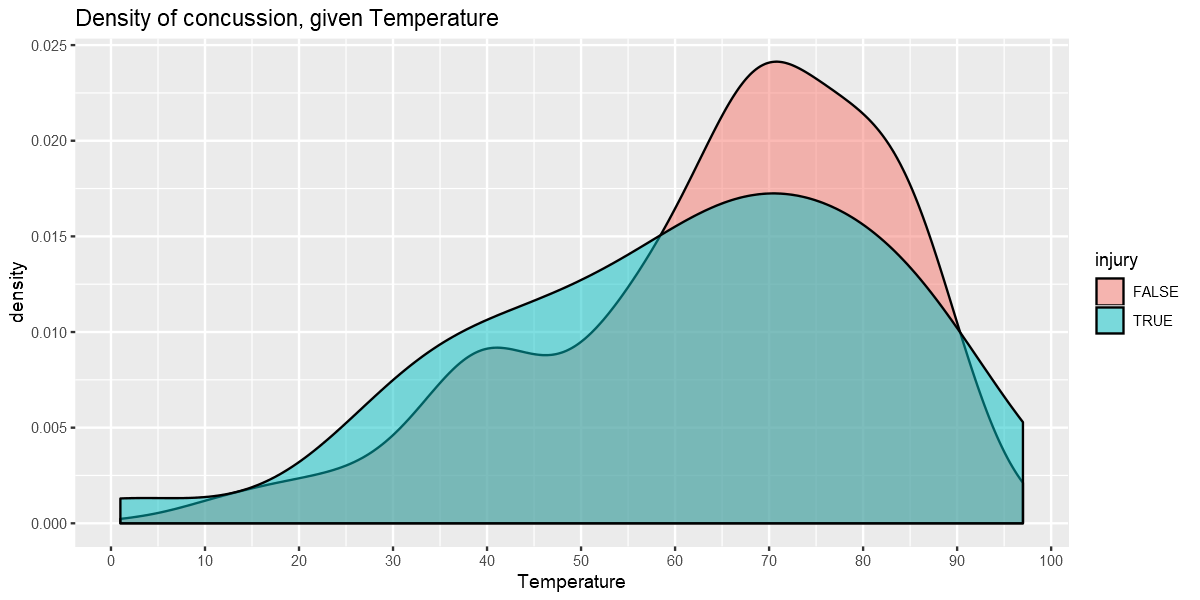

In [277]:
oldw <- getOption("warn")
options(warn = -1)
ggplot(game_data, aes(x = Temperature, fill = injury)) + geom_density(alpha=0.5, aes(fill=factor(injury))) + labs(title="Density of concussion, given Temperature") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10))
options(warn = oldw)

## Formation and Concussion Rates  

In [278]:
head(play_info)

Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Center-J.McQuaide, downed by LA-E.Sims. Dallas challenged the kick downed ruling, and the play was REVERSED. J.Hekker punts 53 yards to end zone, Center-J.McQuaide, Touchback."
2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,Jul-21,"(12:08) J.Hekker punts 51 yards to DAL 20, Center-J.McQuaide, fair catch by L.Whitehead. PENALTY on DAL-K.Wilber, Offensive Holding, 10 yards, enforced at DAL 20."
2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,Jul-21,"(10:01) C.Jones punts 40 yards to LA 42, Center-L.Ladouceur. P.Cooper to DAL 33 for 25 yards (C.Jones; A.Hitchens)."
2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,Jul-24,"(:21) J.Hekker punts 31 yards to DAL 15, Center-J.McQuaide, out of bounds."
2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center-Z.Wood, out of bounds."
2016,Pre,2,08/13/2016,2,2342,09:00,LA 50,3,Punt,LA,LA-DAL,14 - 24,"(9:00) J.Hekker punts 50 yards to end zone, Center-J.Overbaugh, Touchback."


In [279]:
play_info$game_play_id <- paste(play_info$GameKey,play_info$PlayID,sep="_")
vid_rev$game_play_id <- paste(vid_rev$GameKey,vid_rev$PlayID,sep="_")

play_info$injury <- play_info$GameKey %in% vid_rev$GameKey

In [280]:
head(player_role)

Season_Year,GameKey,PlayID,GSISID,Role
2016,2,191,26280,VR
2016,2,191,27787,PRG
2016,2,191,28394,PLS
2016,2,191,28795,PPR
2016,2,191,29676,VL
2016,2,191,29647,PDL1


In [281]:
str(player_role)

'data.frame':	146573 obs. of  5 variables:
 $ Season_Year: int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ GameKey    : int  2 2 2 2 2 2 2 2 2 2 ...
 $ PlayID     : int  191 191 191 191 191 191 191 191 191 191 ...
 $ GSISID     : int  26280 27787 28394 28795 29676 29647 28872 28958 30543 29764 ...
 $ Role       : Factor w/ 52 levels "GL","GLi","GLo",..: 50 44 34 40 47 9 7 23 24 46 ...


In [282]:
summary(player_role)

  Season_Year      GameKey          PlayID         GSISID           Role       
 Min.   :2016   Min.   :  2.0   Min.   :  76   Min.   :19714   PR     :  6698  
 1st Qu.:2016   1st Qu.:164.0   1st Qu.: 958   1st Qu.:29643   PDL1   :  6673  
 Median :2017   Median :339.0   Median :1980   Median :31411   PDR1   :  6670  
 Mean   :2017   Mean   :332.4   Mean   :2014   Mean   :30911   PRG    :  6669  
 3rd Qu.:2017   3rd Qu.:500.0   3rd Qu.:3000   3rd Qu.:32668   P      :  6668  
 Max.   :2017   Max.   :665.0   Max.   :5285   Max.   :34050   PLG    :  6667  
                                                               (Other):106528  

In [283]:
player_role$game_play_id <- paste(player_role$GameKey,player_role$PlayID,sep="_")
head(player_role)


Season_Year,GameKey,PlayID,GSISID,Role,game_play_id
2016,2,191,26280,VR,2_191
2016,2,191,27787,PRG,2_191
2016,2,191,28394,PLS,2_191
2016,2,191,28795,PPR,2_191
2016,2,191,29676,VL,2_191
2016,2,191,29647,PDL1,2_191


In [284]:
temp_table <- select(player_role,game_play_id,Role)
head(temp_table)


game_play_id,Role
2_191,VR
2_191,PRG
2_191,PLS
2_191,PPR
2_191,VL
2_191,PDL1


In [339]:
temp_table <- temp_table %>% arrange(game_play_id, Role)

In [340]:
game_formation_data <- temp_table %>% 
     group_by(game_play_id) %>% 
     summarise(formation = paste0(Role, collapse = "_")) %>%
     select(game_play_id,formation)

In [341]:
head(game_formation_data)

game_play_id,formation
10_1275,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo
10_1409,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo
10_1501,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo
10_2693,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR
10_2810,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo
10_3228,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo


In [342]:
game_formation_data[game_formation_data$game_play_id=="100_1244",]

game_play_id,formation
100_1244,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo


In [343]:
dim(game_formation_data)

[1] 6670    2

### Merging formations data with play information data

In [344]:
str(play_info)

'data.frame':	6681 obs. of  16 variables:
 $ Season_Year         : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Season_Type         : Factor w/ 3 levels "Post","Pre","Reg": 2 2 2 2 2 2 2 2 2 2 ...
 $ GameKey             : int  2 2 2 2 2 2 2 2 2 3 ...
 $ Game_Date           : Factor w/ 142 levels "01-01-2017","01-06-2018",..: 21 21 21 21 21 21 21 21 21 17 ...
 $ Week                : int  2 2 2 2 2 2 2 2 2 2 ...
 $ PlayID              : int  191 1132 1227 1864 2247 2342 2805 2970 3439 455 ...
 $ Game_Clock          : Factor w/ 891 levels "00:00","00:01",..: 750 728 601 22 626 540 28 810 329 404 ...
 $ YardLine            : Factor w/ 1470 levels "ARZ 10","ARZ 11",..: 770 752 370 400 367 774 761 764 367 113 ...
 $ Quarter             : int  1 2 2 2 3 3 3 4 4 1 ...
 $ Play_Type           : Factor w/ 1 level "Punt": 1 1 1 1 1 1 1 1 1 1 ...
 $ Poss_Team           : Factor w/ 33 levels "ARZ","ATL","BLT",..: 17 17 9 17 9 17 17 9 9 3 ...
 $ Home_Team_Visit_Team: Factor w/ 507 l

In [345]:
dim(play_info)

[1] 6681   16

In [346]:
final_formation_data <- merge(play_info, game_formation_data, by='game_play_id')
final_formation_data <- select(final_formation_data,game_play_id,formation,injury)
head(final_formation_data)


game_play_id,formation,injury
10_1275,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,FALSE
10_1409,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,FALSE
10_1501,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,FALSE
10_2693,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,FALSE
10_2810,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,FALSE
10_3228,GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,FALSE


In [347]:
dim(final_formation_data)

[1] 6668    3

### Merging formations data with video review data

In [348]:
str(vid_rev)

'data.frame':	37 obs. of  12 variables:
 $ Season_Year                     : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ GameKey                         : int  5 21 29 45 54 60 144 149 189 218 ...
 $ PlayID                          : int  3129 2587 538 1212 1045 905 2342 3663 3509 3468 ...
 $ GSISID                          : int  29492 32323 29343 27595 32410 32444 30171 29793 30384 32403 ...
 $ Player_Activity_Derived         : Factor w/ 4 levels "Blocked","Blocking",..: 4 1 1 3 2 1 4 2 1 2 ...
 $ Turnover_Related                : Factor w/ 1 level "No": 1 1 1 1 1 1 1 1 1 1 ...
 $ Primary_Impact_Type             : Factor w/ 4 levels "Helmet-to-body",..: 1 3 3 3 1 1 1 3 4 3 ...
 $ Primary_Partner_GSISID          : Factor w/ 35 levels "","23259","24535",..: 33 19 12 21 2 15 8 23 35 30 ...
 $ Primary_Partner_Activity_Derived: Factor w/ 6 levels "","Blocked","Blocking",..: 5 3 3 5 2 2 4 2 6 2 ...
 $ Friendly_Fire                   : Factor w/ 4 levels "","No","Unclear",

In [349]:
dim(vid_rev)

[1] 37 12

In [350]:
data_temporary <- merge(vid_rev, game_formation_data, all.x=TRUE, by='game_play_id')

In [351]:
dim(data_temporary)

[1] 37 13

In [352]:
data_temporary <- data_temporary %>% group_by(formation) %>% dplyr::summarize(Injury_Count = n())
head(data_temporary)

formation,Injury_Count
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,2
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PLG_PLL_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,1
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VRi_VRo,1
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VR,1
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PDR4_PDR5_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,1
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VRi_VRo,1


In [353]:
formation_data <- final_formation_data %>% group_by(formation) %>% dplyr::summarize(Total_Count = n()) %>% arrange(desc(Total_Count))
head(formation_data)

formation,Total_Count
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,370
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,346
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,341
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VR,258
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VR,229
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,216


### Sorting final formation data by Injury counts

In [354]:
final_formation_data_sorted <- arrange(formation_data, desc(Total_Count))
head(final_formation_data_sorted)

formation,Total_Count
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,370
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,346
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,341
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VR,258
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VR,229
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,216


In [355]:
final_final <- merge(data_temporary, formation_data, all=TRUE, by='formation')

In [356]:
dim(data_temporary)

[1] 29  2

In [357]:
dim(formation_data)

[1] 722   2

In [358]:
dim(final_final)

[1] 722   3

#### Filling nulls with zeroes

In [359]:
final_final %>% arrange(desc(Total_Count))

formation,Injury_Count,Total_Count
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,2,370
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,NA,346
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,1,341
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VR,2,258
GL_GR_P_PDL1_PDL2_PDL3_PDL4_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VR,NA,229
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,3,216
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VRi_VRo,NA,174
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PLG_PLL_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,1,140
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VR,2,115
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PLG_PLL1_PLL2_PLR1_PLR2_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,NA,103


In [360]:
final_final[is.na(final_final)] <- 0

In [361]:
head(final_final)

formation,Injury_Count,Total_Count
GL_GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL,0,1
GL_GL_P_PDL1_PDL2_PDL3_PDL4_PDL5_PDL6_PDR1_PDR2_PDR3_PDR3_PDR4_PLG_PLS_PLT_PLW_PPR_PRG_PRT_PRW,0,1
GL_GLi_GLo_GRi_GRo_P_PDL1_PDL2_PDL3_PDR1_PDR2_PLG_PLS_PLT_PR_PRG_PRT_VLi_VLo_VR_VRi_VRo,0,1
GL_GR_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PLG_PLS_PLT_PLW_PR_PRG_PRT_PRW_VLi_VLi_VRi_VRo,0,1
GL_GR_GRi_GRo_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLS_PLT_PPL_PR_PRG_PRT_VL_VLi_VLo_VR,0,1
GL_GR_GRi_GRo_P_PDL1_PDL2_PDR1_PDR2_PDR3_PLG_PLS_PLT_PPL_PR_PRG_PRT_VL_VLi_VLo_VRi_VRo,0,1


In [365]:
finalsort <- final_final %>% group_by(Total_Count,Injury_Count)%>%
  mutate("Mean"=Injury_Count/(Total_Count))

In [366]:
finalsort <- arrange(finalsort, desc(Mean))
head(finalsort)

formation,Injury_Count,Total_Count,Mean
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PFB_PLG_PLM_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VRi_VRo,1,1,1.00000000
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PLG_PLL_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi,1,1,1.00000000
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PLG_PLL1_PLL2_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VRi_VRo,1,2,0.50000000
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PFB_PLG_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VRi_VRo,1,4,0.25000000
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PDR4_PLG_PLL1_PLL2_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,1,5,0.20000000
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PLG_PLR1_PLR2_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VR,1,11,0.09090909


In [367]:
finalsort

formation,Injury_Count,Total_Count,Mean
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PFB_PLG_PLM_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VRi_VRo,1,1,1.000000000
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PLG_PLL_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi,1,1,1.000000000
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PLG_PLL1_PLL2_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VRi_VRo,1,2,0.500000000
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PFB_PLG_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VRi_VRo,1,4,0.250000000
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PDR4_PLG_PLL1_PLL2_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,1,5,0.200000000
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PLG_PLR1_PLR2_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VR,1,11,0.090909091
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PLG_PLR_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,1,17,0.058823529
GL_GR_P_PDL1_PDL2_PDR1_PDR2_PDR3_PLG_PLM_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VLi_VLo_VRi_VRo,2,35,0.057142857
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PLG_PLL_PLM_PLS_PLT_PLW_PPR_PR_PRG_PRT_PRW_VL_VR,1,18,0.055555556
GL_GR_P_PDL1_PDL2_PDL3_PDR1_PDR2_PDR3_PDR4_PLG_PLS_PLT_PLW_PPL_PR_PRG_PRT_PRW_VL_VRi_VRo,1,19,0.052631579


## Next Steps:
- Trying a machine learning approahc e.g. Linear regression to check correlations between variables and concussion rates
- Deep diving into specific formations to see for rule modification opportunities
